In [88]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [89]:
# Create the universe of possible input and output values
red_channel = ctrl.Antecedent(np.arange(0, 256, 1), 'red_channel')
green_channel = ctrl.Antecedent(np.arange(0, 256, 1), 'green_channel')
blue_channel = ctrl.Antecedent(np.arange(0, 256, 1), 'blue_channel')
emotion = ctrl.Consequent(np.arange(0, 30, 1), 'emotion')  # Adjust range based on the number of emotions

In [90]:
# Add a 'Neutral' category for unclassified cases
emotion['Neutral'] = fuzz.trimf(emotion.universe, [72, 73, 74])

# Anger (RGB: 234, 52, 24)
red_channel['Anger'] = fuzz.trimf(red_channel.universe, [214, 234, 254])
green_channel['Anger'] = fuzz.trimf(green_channel.universe, [32, 52, 72])
blue_channel['Anger'] = fuzz.trimf(blue_channel.universe, [4, 24, 44])

# Annoyance (RGB: 239, 147, 143)
red_channel['Annoyance'] = fuzz.trimf(red_channel.universe, [219, 239, 259])
green_channel['Annoyance'] = fuzz.trimf(green_channel.universe, [127, 147, 167])
blue_channel['Annoyance'] = fuzz.trimf(blue_channel.universe, [123, 143, 163])

# Ecstasy (RGB: 251, 233, 111)
red_channel['Ecstasy'] = fuzz.trimf(red_channel.universe, [231, 251, 271])
green_channel['Ecstasy'] = fuzz.trimf(green_channel.universe, [213, 233, 253])
blue_channel['Ecstasy'] = fuzz.trimf(blue_channel.universe, [91, 111, 131])

# Admiration (RGB: 81, 177, 51)
red_channel['Admiration'] = fuzz.trimf(red_channel.universe, [61, 81, 101])
green_channel['Admiration'] = fuzz.trimf(green_channel.universe, [157, 177, 197])
blue_channel['Admiration'] = fuzz.trimf(blue_channel.universe, [31, 51, 71])

# Anticipation (RGB: 242, 172, 99)
red_channel['Anticipation'] = fuzz.trimf(red_channel.universe, [222, 242, 262])
green_channel['Anticipation'] = fuzz.trimf(green_channel.universe, [152, 172, 192])
blue_channel['Anticipation'] = fuzz.trimf(blue_channel.universe, [79, 99, 119])

# Acceptance (RGB: 168, 251, 153)
red_channel['Acceptance'] = fuzz.trimf(red_channel.universe, [148, 168, 188])
green_channel['Acceptance'] = fuzz.trimf(green_channel.universe, [231, 251, 271])
blue_channel['Acceptance'] = fuzz.trimf(blue_channel.universe, [133, 153, 173])

# Apprehension (RGB: 144, 185, 139)
red_channel['Apprehension'] = fuzz.trimf(red_channel.universe, [124, 144, 164])
green_channel['Apprehension'] = fuzz.trimf(green_channel.universe, [165, 185, 205])
blue_channel['Apprehension'] = fuzz.trimf(blue_channel.universe, [119, 139, 159])

# Amazement (RGB: 60, 135, 218)
red_channel['Amazement'] = fuzz.trimf(red_channel.universe, [40, 60, 80])
green_channel['Amazement'] = fuzz.trimf(green_channel.universe, [115, 135, 155])
blue_channel['Amazement'] = fuzz.trimf(blue_channel.universe, [198, 218, 238])

# Boredom (RGB: 246, 200, 251)
red_channel['Boredom'] = fuzz.trimf(red_channel.universe, [226, 246, 266])
green_channel['Boredom'] = fuzz.trimf(green_channel.universe, [180, 200, 220])
blue_channel['Boredom'] = fuzz.trimf(blue_channel.universe, [231, 251, 271])

# Disgust (RGB: 236, 97, 247)
red_channel['Disgust'] = fuzz.trimf(red_channel.universe, [216, 236, 256])
green_channel['Disgust'] = fuzz.trimf(green_channel.universe, [77, 97, 117])
blue_channel['Disgust'] = fuzz.trimf(blue_channel.universe, [227, 247, 267])

# Distraction (RGB: 177, 218, 251)
red_channel['Distraction'] = fuzz.trimf(red_channel.universe, [157, 177, 197])
green_channel['Distraction'] = fuzz.trimf(green_channel.universe, [198, 218, 238])
blue_channel['Distraction'] = fuzz.trimf(blue_channel.universe, [231, 251, 271])

# Fear (RGB: 66, 148, 41)
red_channel['Fear'] = fuzz.trimf(red_channel.universe, [46, 66, 86])
green_channel['Fear'] = fuzz.trimf(green_channel.universe, [128, 148, 168])
blue_channel['Fear'] = fuzz.trimf(blue_channel.universe, [21, 41, 61])

# Grief (RGB: 1, 0, 193)
red_channel['Grief'] = fuzz.trimf(red_channel.universe, [0, 1, 2])
green_channel['Grief'] = fuzz.trimf(green_channel.universe, [0, 0, 1])
blue_channel['Grief'] = fuzz.trimf(blue_channel.universe, [173, 193, 213])

# Interest (RGB: 246, 199, 149)
red_channel['Interest'] = fuzz.trimf(red_channel.universe, [226, 246, 266])
green_channel['Interest'] = fuzz.trimf(green_channel.universe, [179, 199, 219])
blue_channel['Interest'] = fuzz.trimf(blue_channel.universe, [129, 149, 169])

# Joy (RGB: 254, 255, 115)
red_channel['Joy'] = fuzz.trimf(red_channel.universe, [234, 254, 274])
green_channel['Joy'] = fuzz.trimf(green_channel.universe, [235, 255, 275])
blue_channel['Joy'] = fuzz.trimf(blue_channel.universe, [95, 115, 135])

# Loathing (RGB: 204, 43, 216)
red_channel['Loathing'] = fuzz.trimf(red_channel.universe, [184, 204, 224])
green_channel['Loathing'] = fuzz.trimf(green_channel.universe, [23, 43, 63])
blue_channel['Loathing'] = fuzz.trimf(blue_channel.universe, [196, 216, 236])

# Pensiveness (RGB: 142, 142, 248)
red_channel['Pensiveness'] = fuzz.trimf(red_channel.universe, [122, 142, 162])
green_channel['Pensiveness'] = fuzz.trimf(green_channel.universe, [122, 142, 162])
blue_channel['Pensiveness'] = fuzz.trimf(blue_channel.universe, [228, 248, 268])

# Rage (RGB: 193, 40, 27)
red_channel['Rage'] = fuzz.trimf(red_channel.universe, [173, 193, 213])
green_channel['Rage'] = fuzz.trimf(green_channel.universe, [20, 40, 60])
blue_channel['Rage'] = fuzz.trimf(blue_channel.universe, [7, 27, 47])

# Sadness (RGB: 83, 80, 246)
red_channel['Sadness'] = fuzz.trimf(red_channel.universe, [63, 83, 103])
green_channel['Sadness'] = fuzz.trimf(green_channel.universe, [60, 80, 100])
blue_channel['Sadness'] = fuzz.trimf(blue_channel.universe, [226, 246, 266])

# Serenity (RGB: 255, 254, 187)
red_channel['Serenity'] = fuzz.trimf(red_channel.universe, [235, 255, 275])
green_channel['Serenity'] = fuzz.trimf(green_channel.universe, [234, 254, 274])
blue_channel['Serenity'] = fuzz.trimf(blue_channel.universe, [167, 187, 207])

# Surprise (RGB: 116, 186, 249)
red_channel['Surprise'] = fuzz.trimf(red_channel.universe, [96, 116, 136])
green_channel['Surprise'] = fuzz.trimf(green_channel.universe, [166, 186, 206])
blue_channel['Surprise'] = fuzz.trimf(blue_channel.universe, [229, 249, 269])

# Trust (RGB: 137, 252, 109)
red_channel['Trust'] = fuzz.trimf(red_channel.universe, [117, 137, 157])
green_channel['Trust'] = fuzz.trimf(green_channel.universe, [232, 252, 272])
blue_channel['Trust'] = fuzz.trimf(blue_channel.universe, [89, 109, 129])

# Terror (RGB: 55, 126, 34)
red_channel['Terror'] = fuzz.trimf(red_channel.universe, [35, 55, 75])
green_channel['Terror'] = fuzz.trimf(green_channel.universe, [106, 126, 146])
blue_channel['Terror'] = fuzz.trimf(blue_channel.universe, [14, 34, 54])

# Vigilance (RGB: 239, 132, 50)
red_channel['Vigilance'] = fuzz.trimf(red_channel.universe, [219, 239, 259])
green_channel['Vigilance'] = fuzz.trimf(green_channel.universe, [112, 132, 152])
blue_channel['Vigilance'] = fuzz.trimf(blue_channel.universe, [30, 50, 70])

In [106]:
# Adjusted emotion membership functions with overlap
emotion['Anger'] = fuzz.trimf(emotion.universe, [0, 1, 3])
emotion['Annoyance'] = fuzz.trimf(emotion.universe, [2, 4, 6])
emotion['Ecstasy'] = fuzz.trimf(emotion.universe, [5, 7, 9])
emotion['Admiration'] = fuzz.trimf(emotion.universe, [8, 10, 12])
emotion['Anticipation'] = fuzz.trimf(emotion.universe, [11, 13, 15])
emotion['Interest'] = fuzz.trimf(emotion.universe, [14, 16, 18])
emotion['Joy'] = fuzz.trimf(emotion.universe, [17, 19, 21])
emotion['Serenity'] = fuzz.trimf(emotion.universe, [20, 22, 24])
emotion['Trust'] = fuzz.trimf(emotion.universe, [23, 25, 27])
emotion['Acceptance'] = fuzz.trimf(emotion.universe, [26, 28, 30])
emotion['Terror'] = fuzz.trimf(emotion.universe, [29, 31, 33])
emotion['Fear'] = fuzz.trimf(emotion.universe, [32, 34, 36])
emotion['Apprehension'] = fuzz.trimf(emotion.universe, [35, 37, 39])
emotion['Amazement'] = fuzz.trimf(emotion.universe, [38, 40, 42])
emotion['Surprise'] = fuzz.trimf(emotion.universe, [41, 43, 45])
emotion['Distraction'] = fuzz.trimf(emotion.universe, [44, 46, 48])
emotion['Grief'] = fuzz.trimf(emotion.universe, [47, 49, 51])
emotion['Sadness'] = fuzz.trimf(emotion.universe, [50, 52, 54])
emotion['Pensiveness'] = fuzz.trimf(emotion.universe, [53, 55, 57])
emotion['Loathing'] = fuzz.trimf(emotion.universe, [56, 58, 60])
emotion['Disgust'] = fuzz.trimf(emotion.universe, [59, 61, 63])
emotion['Boredom'] = fuzz.trimf(emotion.universe, [62, 64, 66])
emotion['Rage'] = fuzz.trimf(emotion.universe, [65, 67, 69])
emotion['Vigilance'] = fuzz.trimf(emotion.universe, [68, 70, 72])

# Adjust the 'Neutral' category to cover any remaining unclassified cases
emotion['Neutral'] = fuzz.trimf(emotion.universe, [71, 72, 73])


In [107]:
# Add a default rule for unclassified emotions
default_rule = ctrl.Rule(
    ~red_channel['Anger'] & ~green_channel['Anger'] & ~blue_channel['Anger'] &
    ~red_channel['Annoyance'] & ~green_channel['Annoyance'] & ~blue_channel['Annoyance'] &
    ~red_channel['Ecstasy'] & ~green_channel['Ecstasy'] & ~blue_channel['Ecstasy'] &
    ~red_channel['Admiration'] & ~green_channel['Admiration'] & ~blue_channel['Admiration'] &
    ~red_channel['Anticipation'] & ~green_channel['Anticipation'] & ~blue_channel['Anticipation'] &
    ~red_channel['Acceptance'] & ~green_channel['Acceptance'] & ~blue_channel['Acceptance'] &
    ~red_channel['Apprehension'] & ~green_channel['Apprehension'] & ~blue_channel['Apprehension'] &
    ~red_channel['Amazement'] & ~green_channel['Amazement'] & ~blue_channel['Amazement'] &
    ~red_channel['Boredom'] & ~green_channel['Boredom'] & ~blue_channel['Boredom'] &
    ~red_channel['Disgust'] & ~green_channel['Disgust'] & ~blue_channel['Disgust'] &
    ~red_channel['Distraction'] & ~green_channel['Distraction'] & ~blue_channel['Distraction'] &
    ~red_channel['Fear'] & ~green_channel['Fear'] & ~blue_channel['Fear'] &
    ~red_channel['Grief'] & ~green_channel['Grief'] & ~blue_channel['Grief'] &
    ~red_channel['Interest'] & ~green_channel['Interest'] & ~blue_channel['Interest'] &
    ~red_channel['Joy'] & ~green_channel['Joy'] & ~blue_channel['Joy'] &
    ~red_channel['Loathing'] & ~green_channel['Loathing'] & ~blue_channel['Loathing'] &
    ~red_channel['Pensiveness'] & ~green_channel['Pensiveness'] & ~blue_channel['Pensiveness'] &
    ~red_channel['Rage'] & ~green_channel['Rage'] & ~blue_channel['Rage'] &
    ~red_channel['Sadness'] & ~green_channel['Sadness'] & ~blue_channel['Sadness'] &
    ~red_channel['Serenity'] & ~green_channel['Serenity'] & ~blue_channel['Serenity'] &
    ~red_channel['Surprise'] & ~green_channel['Surprise'] & ~blue_channel['Surprise'] &
    ~red_channel['Trust'] & ~green_channel['Trust'] & ~blue_channel['Trust'] &
    ~red_channel['Terror'] & ~green_channel['Terror'] & ~blue_channel['Terror'] &
    ~red_channel['Vigilance'] & ~green_channel['Vigilance'] & ~blue_channel['Vigilance'],
    emotion['Neutral']
)

In [108]:
# Define rules for each emotion
rule1 = ctrl.Rule(red_channel['Anger'] & green_channel['Anger'] & blue_channel['Anger'], emotion['Anger'])
rule2 = ctrl.Rule(red_channel['Annoyance'] & green_channel['Annoyance'] & blue_channel['Annoyance'], emotion['Annoyance'])
rule3 = ctrl.Rule(red_channel['Ecstasy'] & green_channel['Ecstasy'] & blue_channel['Ecstasy'], emotion['Ecstasy'])
rule4 = ctrl.Rule(red_channel['Admiration'] & green_channel['Admiration'] & blue_channel['Admiration'], emotion['Admiration'])
rule5 = ctrl.Rule(red_channel['Anticipation'] & green_channel['Anticipation'] & blue_channel['Anticipation'], emotion['Anticipation'])
rule6 = ctrl.Rule(red_channel['Interest'] & green_channel['Interest'] & blue_channel['Interest'], emotion['Interest'])
rule7 = ctrl.Rule(red_channel['Joy'] & green_channel['Joy'] & blue_channel['Joy'], emotion['Joy'])
rule8 = ctrl.Rule(red_channel['Serenity'] & green_channel['Serenity'] & blue_channel['Serenity'], emotion['Serenity'])
rule9 = ctrl.Rule(red_channel['Trust'] & green_channel['Trust'] & blue_channel['Trust'], emotion['Trust'])
rule10 = ctrl.Rule(red_channel['Acceptance'] & green_channel['Acceptance'] & blue_channel['Acceptance'], emotion['Acceptance'])
rule11 = ctrl.Rule(red_channel['Terror'] & green_channel['Terror'] & blue_channel['Terror'], emotion['Terror'])
rule12 = ctrl.Rule(red_channel['Fear'] & green_channel['Fear'] & blue_channel['Fear'], emotion['Fear'])
rule13 = ctrl.Rule(red_channel['Apprehension'] & green_channel['Apprehension'] & blue_channel['Apprehension'], emotion['Apprehension'])
rule14 = ctrl.Rule(red_channel['Amazement'] & green_channel['Amazement'] & blue_channel['Amazement'], emotion['Amazement'])
rule15 = ctrl.Rule(red_channel['Surprise'] & green_channel['Surprise'] & blue_channel['Surprise'], emotion['Surprise'])
rule16 = ctrl.Rule(red_channel['Distraction'] & green_channel['Distraction'] & blue_channel['Distraction'], emotion['Distraction'])
rule17 = ctrl.Rule(red_channel['Grief'] & green_channel['Grief'] & blue_channel['Grief'], emotion['Grief'])
rule18 = ctrl.Rule(red_channel['Sadness'] & green_channel['Sadness'] & blue_channel['Sadness'], emotion['Sadness'])
rule19 = ctrl.Rule(red_channel['Pensiveness'] & green_channel['Pensiveness'] & blue_channel['Pensiveness'], emotion['Pensiveness'])
rule20 = ctrl.Rule(red_channel['Loathing'] & green_channel['Loathing'] & blue_channel['Loathing'], emotion['Loathing'])
rule21 = ctrl.Rule(red_channel['Disgust'] & green_channel['Disgust'] & blue_channel['Disgust'], emotion['Disgust'])
rule22 = ctrl.Rule(red_channel['Boredom'] & green_channel['Boredom'] & blue_channel['Boredom'], emotion['Boredom'])
rule23 = ctrl.Rule(red_channel['Rage'] & green_channel['Rage'] & blue_channel['Rage'], emotion['Rage'])
rule24 = ctrl.Rule(red_channel['Vigilance'] & green_channel['Vigilance'] & blue_channel['Vigilance'], emotion['Vigilance'])

In [109]:
# Create a control system with the defined rules
emotion_control = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10,
                                      rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20,
                                      rule21, rule22, rule23, rule24, default_rule])

# Create a ControlSystemSimulation object
emotion_sim = ctrl.ControlSystemSimulation(emotion_control)

In [110]:
def evaluate_pixel_emotion(r, g, b):
    emotion_sim.input['red_channel'] = r
    emotion_sim.input['green_channel'] = g
    emotion_sim.input['blue_channel'] = b
    emotion_sim.compute()
    return emotion_sim.output['emotion']

def process_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    emotion_counts = {emotion: 0 for emotion in emotion.terms}

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            r, g, b = img[i, j]
            emotion_value = evaluate_pixel_emotion(r, g, b)
            # Find the closest defined emotion
            closest_emotion = min(emotion_counts.keys(), key=lambda x: abs(emotion_value - emotion[x].mf_peak))
            emotion_counts[closest_emotion] += 1

    return emotion_counts

def plot_emotions(emotion_counts):
    emotions = list(emotion_counts.keys())
    counts = [emotion_counts[emotion] for emotion in emotions]

    plt.figure(figsize=(10, 6))
    plt.bar(emotions, counts, color='skyblue')
    plt.xlabel('Emotions')
    plt.ylabel('Counts')
    plt.title('Emotion Distribution in Image')
    plt.xticks(rotation=45)
    plt.show()

In [113]:
# # Example usage
emotion_counts = process_image('ade_test1.jpg')
plot_emotions(emotion_counts)

ValueError: Crisp output cannot be calculated, likely because the system is too sparse. Check to make sure this set of input values will activate at least one connected Term in each Antecedent via the current set of Rules.

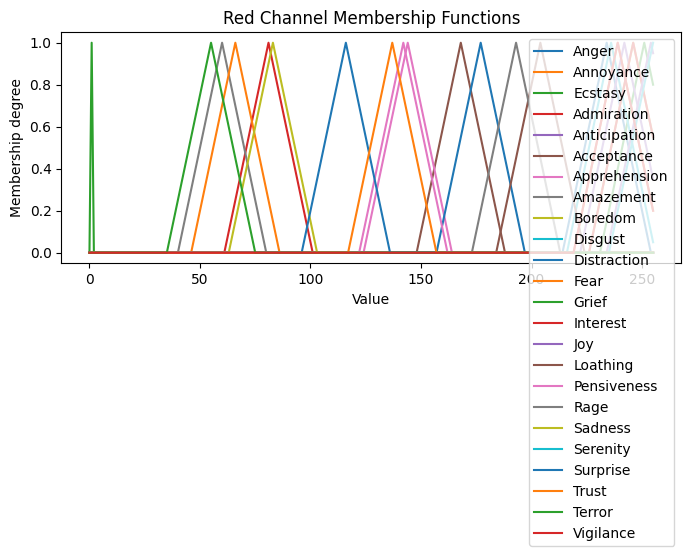

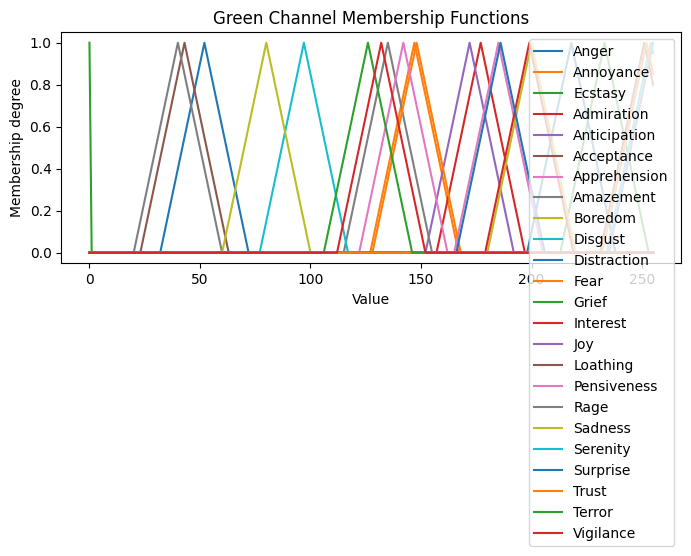

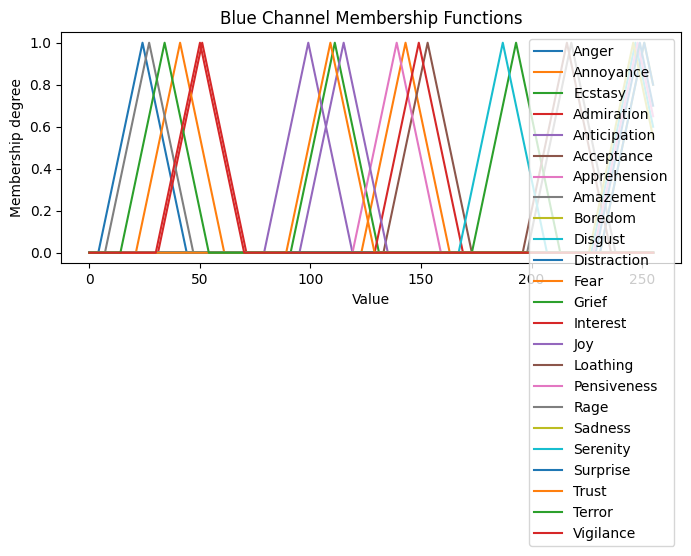

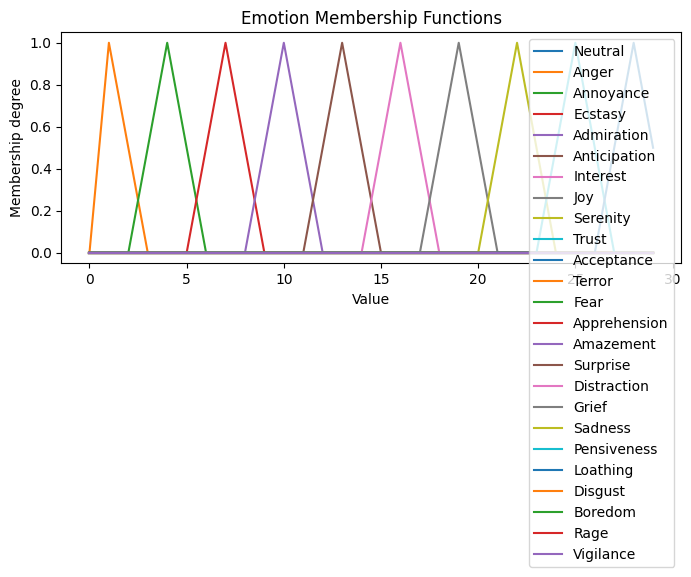

In [112]:
def plot_membership_functions(variable, title):
    plt.figure(figsize=(8, 3))
    for term in variable.terms:
        plt.plot(variable.universe, variable[term].mf, label=term)
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Membership degree')
    plt.legend()
    plt.show()

# Plotting for each color channel
plot_membership_functions(red_channel, 'Red Channel Membership Functions')
plot_membership_functions(green_channel, 'Green Channel Membership Functions')
plot_membership_functions(blue_channel, 'Blue Channel Membership Functions')

# Plotting for emotion
plot_membership_functions(emotion, 'Emotion Membership Functions')